# Problem Set 7

## Problem 1

Solve the following LP problem both in Matlab (Python) using **linprog** (*SymPy*) and directly by plotting the required regions:

minimize $f(x) = x_1 + x_2$ subject to:
$$
2 x_1 + 2 x_2 \geq 3\\
x_1 + 2 x_2 \geq 2\\
3 x_1 - x_2 \leq 6\\
3 x_2 - x_1 \leq 6.
$$

### Solution

Let's start by programmed analytical solution:

In [ ]:
from optlang import Model, Variable, Constraint, Objective

x1 = Variable('x1')
x2 = Variable('x2')

c1 = Constraint(2*x1 + x2, lb=2)
c2 = Constraint(x1 + 2*x2, lb=2)
c3 = Constraint(3*x1 - x2, ub = 6)
c4 = Constraint(3*x2 - x1, ub = 6)

f = Objective(x1 + x2, direction='max')

mod = Model(name='Problem 1')

mod.objective = f
mod.add([c1, c2, c3, c4])

opt = mod.optimize()

print('Function maximum: {}'.format(mod.objective.value))
print('At:')
for x in mod.variables:
    print(f'{x.name} = {x.primal}')


The programmable solution gave us the following result:

$$
f_{max} = 6,\\
x_{1_{max}} = 3, \hspace{3mm} x_{2_{max}} = 3.
$$

Now let's solve "by hand".
We can do this either by solving for regions of $x_1$ and $x_2$, or plotting the regions on 2D plot, or by explicitly plotting the function region that satisfies the condition. This we'll do:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
%matplotlib widget

x1 = np.arange(-5, 5, 0.005)
x2 = np.arange(-5, 5, 0.005)

X1, X2 = np.meshgrid(x1, x2)

c1 = 2*X1 + X2
c2 = X1 + 2*X2
c3 = 3*X1 - X2
c4 = 3*X2 - X1

f = X1 + X2

c = (c1 >= 3) & (c2 >= 2) & (c3 <= 6) & (c4 <= 6)
x1_c = np.unique(X1[c])
x2_c = np.unique(X2[c])

X1_c, X2_c = np.meshgrid(x1_c, x2_c)
f_c = X1_c + X2_c

ax = plt.subplot(projection='3d')

p = ax.plot_surface(X1, X2, f, alpha=0.25)
p._facecolors2d = p._facecolor3d
p._edgecolors2d = p._edgecolor3d

p = ax.plot_surface(X1_c, X2_c, f_c, color='red')
p._facecolors2d = p._facecolor3d
p._edgecolors2d = p._edgecolor3d

ax.set_title('Function Condition Region')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$x_1 + x_2$')
ax.legend(('$f(x_1, x_2)$', '$f(x_1, x_2) \cup c_i$'))

From this point we can derive the minimum by looking at the graph (it would be easier done in 2D plot) or just taking the maximum of $f(x_1, x_2) \cup c_i$:

In [ ]:
print('Function Maximum: {0:,.3f}'.format(np.max(f_c)))
print('At:')
idx_max = np.unravel_index(np.argmax(f_c), f_c.shape)
print('x1 = {0:,.3f}\nx2 = {0:,.3f}'.format(X1_c[idx_max], X2_c[idx_max]))

## Problem 2

Consider the data:

$$
x = 1:24\\
y = [75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72].
$$

with the cubic, $y = Ax^3 + Bx^2 + Cx + D$, chosen to fit them.

**(a)** Find the best fit by using **fminsearch** starting with the initial condition $(1, 1, 1, 60)$  

**(b)** Set up the normal equation and find the least-squares fir by solving it.  

**(c)** find the fir by using the genetic algorithm starting with the same initial condition as in (a). If there is no convergence, or it is too slow, try other initial conditions.  

**(d)** Compare the computational times by the genetic algorithm with the **fminsearch** method, for example using **tic** and **toc** commands in Matlab. The minima in both cases have to agree with each other within 1%. You should use the same initial conditions in both methods.

### Solution

#### (a)

Starting with the auto optimization by **scipy**:

In [ ]:
from scipy import optimize as opt

In [ ]:
%matplotlib widget

x = np.arange(1, 25)
y = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])

def cubic(x, *args):
    f = np.zeros(x.shape)
    for i, val in enumerate(args):
        f += val*x**i
    return f

p0 = np.array([1, 1, 1, 60])
coefs = opt.curve_fit(cubic, x, y, p0=p0)

plt.plot(x, y, lw=0, marker='.')
f = cubic(x, *coefs[0])
plt.plot(x, f)

np.set_printoptions(precision=2, suppress=True)
plt.legend(('Data', 'Fit: ${0:,.2f}x^3+{1:,.2f}x^2+{2:,.2f}x+{3:,.2f}$'.format(*coefs[0])))
plt.title('Scipy optimize.curve_fit')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()

#### (b)

Now let's perform linear regression with normal equation:

In [ ]:
X = np.ones((len(x), 4))
X[:, 1] = x
X[:, 2] = x**2
X[:, 3] = x**3

Theta = np.linalg.inv((X.T).dot(X)).dot(X.T.dot(y))
print('h = {0:,.2f}x^3+{1:,.2f}x^2+{2:,.2f}x+{3:,.2f}'.format(*Theta))

In [ ]:
error = np.sum(np.power(X.dot(Theta.T) - y, 2))
print('Error {:0,.3f}'.format(error))

The fit was found and the coefficients coincide.

#### (c)

We will aim to the same (maybe a bit less) precision.

In [ ]:
from numpy import random as rnd

In [ ]:
target_error = 38

samples = 400
k = 10
fittest = int(samples/k)
iters = 50000
n = len(y) #data points

p0 = np.array([80, 0, -2,  0]) #initial conditions
C = np.zeros((samples, len(p0)))
for i in range(samples):
    C[i, :] = p0 #populating matrix C with initial conditions

#rand = rnd.normal(0, 1, C.shape)
#C += rand


for i in range(iters):
    
    H = X.dot(C.T) #matrix of hypothetical vectors

    E = np.zeros(samples)
    for j in range(samples):
        E[j] = np.sum(np.power(H[:, j] - y, 2))

    index = np.argsort(E) 
    index = index[:fittest] #choosing the best %fittest% results
    C = C[index, :]

    C1 = np.copy(C)

    scale = i if i != 0 else 1

    for j in range(k-1):
        C1 = np.vstack((
            C1,
            C + (rnd.normal(0, 2*j+1, C.shape))/np.sqrt(scale)
        ))
    
    C = C1
    print(E[index[0]], C[index[0], :])
    if (np.abs(E[index[0]] - target_error) < 1):
        print('Target reached')
        print(E[index[0]], C[index[0], :])
        break



There is no  point in timing the genetic algorithm function as it takes much longer than several milliseconds required for the **optimize.minimize** function to complete:

In [ ]:
%timeit coefs = opt.curve_fit(cubic, x, y, p0=p0)

An average of $657 \mu s$ is nowhere near the ~1 min mark of the generic algorithm. Which, by the way, not always provides the convergence to the correct answer, sometimes falling into itsown local minimas.

The genetic algorithm gave the following error:

In [ ]:
print('{0:,.1f}% of target_error'.format(E[index[0]]/target_error*100))

This is more than 1% required, but I was not able to make the GA behave better even after lots of modifications.

## Problem 3

Find the Fourier cosine series of $\sin(x)$ and sine series of $\cos(x)$ on $[0, \pi]$. Which one does a better job of representing its function and why? Make plots of 2-term as well as 10-term approximations together with the original functions.

3.14

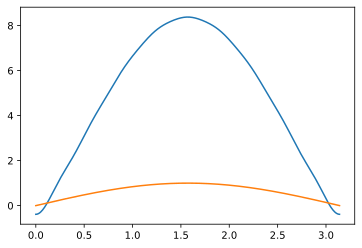

In [247]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

x = np.arange(0, np.pi, 0.01)

f = np.zeros(x.shape)

for i, x_ in enumerate(x):
    for k in range(0, 10):
        f[i] += 4/(1-2*k**2)*np.cos(2*k*x_)
    f[i] += np.pi/4

plt.plot(x, f)
plt.plot(x, np.sin(x))

## Problem 4

## Problem 5

## Problem 6

## Problem 7

Given the data:

$$
x = [1:10],\\
y = [0.78, 1.27, 1.33, 1.69, 1.96, 1.67, 2.07, 2.11, 1.91, 1.92],
$$

determine the least squares fit of the form $y = a(1-exp(-bx))$ by setting up a nonlinear system of equations for $a$ and $b$ and solving it with Newton's method (that you should implement yourself).

### Solution

First, let's plot the data:

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
x = np.arange(1, 11)
y = np.array([0.78, 1.27, 1.33, 1.69, 1.96, 1.67, 2.07, 2.11, 1.91, 1.92])

plt.plot(x, y, lw=0, marker='.')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
tmp = plt.title('Data')



In this case we are searching for minimum of the error function (let it be **rms**). Let's wrap it up in some math symbols:

$$
f(x) = a(1 - e^{-bx}),\\
\hspace{3mm}\\
J = J(a, b) = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}{(f(x_i) - y_i)^2}}.
$$

Then the Newton's optimization method for $J(a, b)$ will be:

$$
a^{k+1} = a^{k} - \frac{\partial J}{\partial a}(a^k, b^k) / \frac{\partial^2 J}{\partial a^2}(a^k, b^k),\\
\hspace{3mm}\\
b^{k+1} = b^{k} - \frac{\partial J}{\partial b}(a^k, b^k) / \frac{\partial J}{\partial b}(a^k, b^k),
$$

where

$$
\frac{\partial J}{\partial a}(a^k, b^k) = \sqrt{\frac{1}{n}} \frac{\sum\limits_{i=1}^{n}{(f_i - y_i)\frac{\partial f_i}{\partial a_i}}}{\sqrt{\sum\limits_{i=1}^{n}{(f_i - y_i)^2}}}(a^k, b^k) \\
\hspace{3mm}\\
\frac{\partial J}{\partial b}(a^k, b^k) = \sqrt{\frac{1}{n}} \frac{\sum\limits_{i=1}^{n}{(f_i - y_i)\frac{\partial f_i}{\partial b_i}}}{\sqrt{\sum\limits_{i=1}^{n}{(f_i - y_i)^2}}}(a^k, b^k),\\
\hspace{3mm}\\
\frac{\partial f}{\partial a} = 1 - e^{-bx}, \hspace{3mm} \frac{\partial f}{\partial b} = axe^{-bx}.
$$

Note, that $k$ superscript denotes the $k^{th}$ iteration of $a$, $b$.

In [209]:
#fit function
def func(x, a, b):
    return a*(1 - np.exp(-b*x))

def dfda(x, a, b):
    return 1 - np.exp(-b*x)

def dfdb(x, a, b):
    return a*x*np.exp(-b*x)

#rms function
def J(x, a, b, y):
    n = len(x)
    f = func(x, a, b)
    return np.sqrt(1/n)*np.sqrt(np.sum(np.power(f - y, 2)))

In [210]:
a = np.arange(-5, 5, 0.01)
b = np.arange(-1, 5, 0.01)

A, B = np.meshgrid(a, b)
JJ = np.zeros(A.shape)
for i in range(JJ.shape[0]):
    for j in range(JJ.shape[1]):
        JJ[i][j] = J(x, A[i][j], B[i][j], y)

Let's plot the cost function just for lulz:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
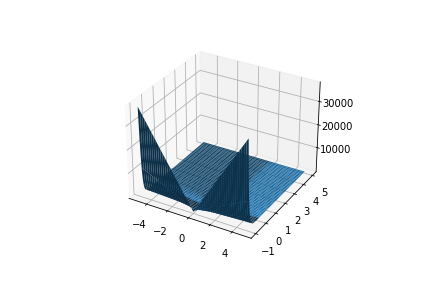

In [211]:
%matplotlib widget
ax = plt.subplot(projection='3d')
ax.plot_surface(A, B, JJ)

And try ro figure out what is the minimum and its corresponding $a$ and $b$:

In [212]:
m = np.argmin(JJ)
JJ.flatten()[m]
print('Cost function minimum: {0:,.3f} at a = {1:,.2f}, b = {2:,.2f}'.format(JJ.flatten()[m], A.flatten()[m], B.flatten()[m]))

Cost function minimum: 0.125 at a = 2.02, b = 0.45


And plot the resulting function:

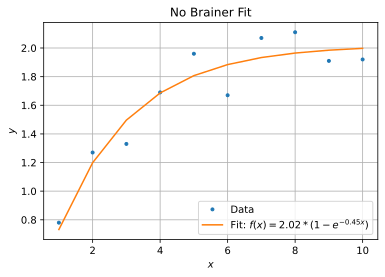

In [213]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
a, b = A.flatten()[m], B.flatten()[m]
plt.plot(x, y, lw=0, marker='.')
plt.plot(x, func(x, a, b))
plt.legend(('Data', 'Fit: $f(x) = {:0,.2f}*(1 - e^{{-{:1,.2f}x}})$'.format(a, b)))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('No Brainer Fit')
plt.grid()

But now let's try to implement the Newton's method like real bad bois! But we'll switch to **mse** cost function as **rms** showed bad behavior and is too complex:

$$
J = \frac{1}{2n}\sum\limits_{i=1}^{n}{(f_i - y_i)^2},\\
\hspace{3mm}\\
\frac{\partial J}{\partial a} = \frac{1}{n}\sum\limits_{i=1}^{n}{\Big [(f_i - y_i)\frac{\partial f}{\partial a} \Big ]},\\
\hspace{3mm}\\
\frac{\partial J}{\partial b} = \frac{1}{n}\sum\limits_{i=1}^{n}{\Big [(f_i - y_i)\frac{\partial f}{\partial b} \Big ]},\\
\hspace{3mm}\\
H(J) = 
\begin{bmatrix}
\frac{\partial^2 J}{\partial a^2} & \frac{\partial^2 J}{\partial a \partial b}\\
\frac{\partial^2 J}{\partial b \partial a} & \frac{\partial^2 J}{\partial b^2}
\end{bmatrix}.
$$

In [214]:
def faa(x, a, b):

    return 0

def fbb(x, a, b):

    return -a*np.power(x, 2)*np.exp(-b*x)

def fab(x, a, b):

    return x*np.exp(-b*x)

def J(x, a, b, y):
    n = len(x)
    f = func(x, a, b)

    return 1/(2*n)*np.sum(np.power(f - y, 2))

def dJda(x, a, b, y):
    n = len(x)
    f = func(x, a, b)

    return 1/n*np.sum((f - y)*dfda(x, a, b))

def dJdb(x, a, b, y):
    n = len(x)
    f = func(x, a, b)

    return 1/n*np.sum((f - y)*dfdb(x, a, b))

def Jaa(x, a, b, y):
    n = len(x)
    f = func(x, a, b)
    fa = dfda(x, a, b)

    return 1/n * np.sum(fa*fa + (f - y)*faa(x, a, b))

def Jbb(x, a, b, y):
    n = len(x)
    f = func(x, a, b)
    fb = dfdb(x, a, b)

    return 1/n * np.sum(fb*fb + (f - y)*fbb(x, a, b))

def Jab(x, a, b, y):
    n = len(x)
    f = func(x, a, b)
    fa = dfda(x, a, b)
    fb = dfdb(x, a, b)
    f2 = fab(x, a, b)

    return 1/n * np.sum(fa*fb + f2*(f - y))

def grad(x, a, b):
    G = np.zeros(2)

    G[0] = dJda(x, a, b, y)
    G[1] = dJdb(x, a, b, y)

    return G



def HJ(x, a, b, y):
    H = np.zeros((2, 2))
    H[0][0] = Jaa(x, a, b, y)
    H[1][0] = H[0][1] = Jab(x, a, b, y)
    H[1][1] = Jbb(x, a, b, y)

    return H

Plotting **mse**:

In [215]:
a = np.arange(0, 4, 0.01)
b = np.arange(0, 4, 0.01)

A, B = np.meshgrid(a, b)

HH = np.zeros(A.shape)

for i in range(HH.shape[0]):
    for j in range(HH.shape[1]):
        HH[i][j] = J(x, A[i][j], B[i][j], y)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
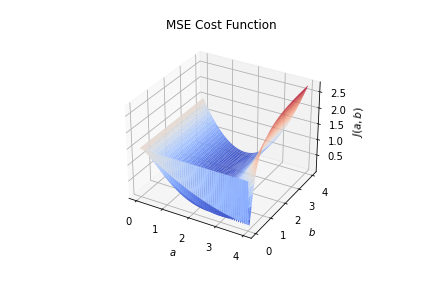

In [232]:
%matplotlib widget
from matplotlib import cm
ax = plt.subplot(projection='3d')
#ax.set_zlim(100)
#ax.set_xlim(2)
#ax.set_ylim(2)
ax.plot_surface(A, B, HH, cmap=cm.coolwarm)
ax.set_title('MSE Cost Function')
ax.set_xlabel('$a$')
ax.set_ylabel('$b$')
tmp = ax.set_zlabel('$J(a, b)$')

In [228]:
iters = 50000
target_accuracy = 0.005

points = np.zeros((iters, 2))

p0 = np.array([1, 1])

for i in range(iters):

    points[i, :] = p0

    inv = np.linalg.inv(HJ(x, p0[0], p0[1], y))

    scale = i if i else 1

    p = p0 - inv.dot(grad(x, p0[0], p0[1]))/np.sqrt(scale)/100

    if (J(x, p[0], p[1], y) > J(x, p[0], p[1], y)):
        print('Divergence started to occur at step {}'.format(i))
        print('J = {:0,.3f} at a={:1,.2f}, b={:2,.2f}'.format(J(x, p0[0], p0[1], y), p0[0], p0[1]))
        break

    if (J(x, p[0], p[1], y) < target_accuracy):
        print('Reasonable accuracy reached')
        print('J = {:0,.3f} at a={:1,.2f}, b={:2,.2f}'.format(J(x, p[0], p[1], y), p[0], p[1]))
        break

    p0 = p

if (i == iters-1):
    print('Iterations expired')
    print('J = {:0,.3f} at a={:1,.2f}, b={:2,.2f}'.format(J(x, p[0], p[1], y), p[0], p[1]))

    

Iterations expired
J = 0.008 at a=1.99, b=0.47


I assure the reader that iterations may be prolonged to achieve better results by the cost of time. However, the coefficients we received quite coincide with the no-brain fit method and lay prettily on the graph:

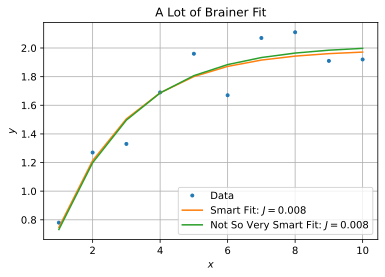

In [229]:
%matplotlib inline
plt.plot(x, y, lw=0, marker='.')
plt.plot(x, func(x, p[0], p[1]))
plt.plot(x, func(x, 2.02, 0.45))
plt.grid()
plt.title('A Lot of Brainer Fit')
plt.xlabel('$x$')
plt.ylabel('$y$')

tmp = plt.legend(('Data', 
            'Smart Fit: $J = {:0,.3f}$'.format(J(x, p0[0], p0[1], y)),
            'Not So Very Smart Fit: $J = {:0,.3f}$'.format(J(x, 2.02, 0.45, y))
        ))          

Mission accomplished!